Tables in Database: ['Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes']

Table: Player_Attributes
  id (INTEGER)
  player_fifa_api_id (INTEGER)
  player_api_id (INTEGER)
  date (TEXT)
  overall_rating (INTEGER)
  potential (INTEGER)
  preferred_foot (TEXT)
  attacking_work_rate (TEXT)
  defensive_work_rate (TEXT)
  crossing (INTEGER)
  finishing (INTEGER)
  heading_accuracy (INTEGER)
  short_passing (INTEGER)
  volleys (INTEGER)
  dribbling (INTEGER)
  curve (INTEGER)
  free_kick_accuracy (INTEGER)
  long_passing (INTEGER)
  ball_control (INTEGER)
  acceleration (INTEGER)
  sprint_speed (INTEGER)
  agility (INTEGER)
  reactions (INTEGER)
  balance (INTEGER)
  shot_power (INTEGER)
  jumping (INTEGER)
  stamina (INTEGER)
  strength (INTEGER)
  long_shots (INTEGER)
  aggression (INTEGER)
  interceptions (INTEGER)
  positioning (INTEGER)
  vision (INTEGER)
  penalties (INTEGER)
  marking (INTEGER)
  standing_tackle (INTEGER)
  sliding_tackle (INTEGER)
 

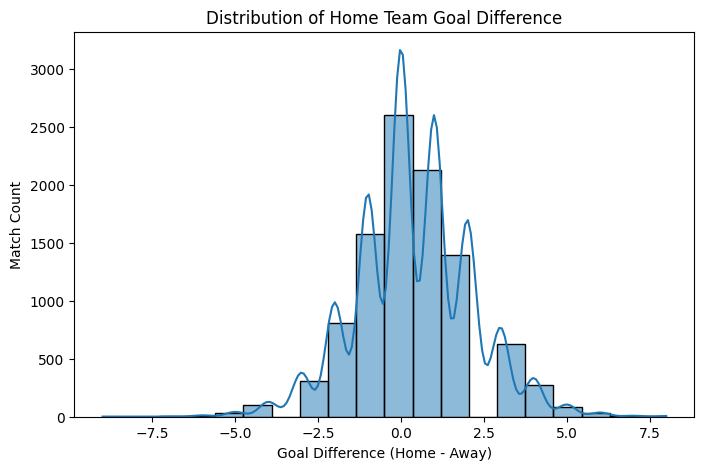

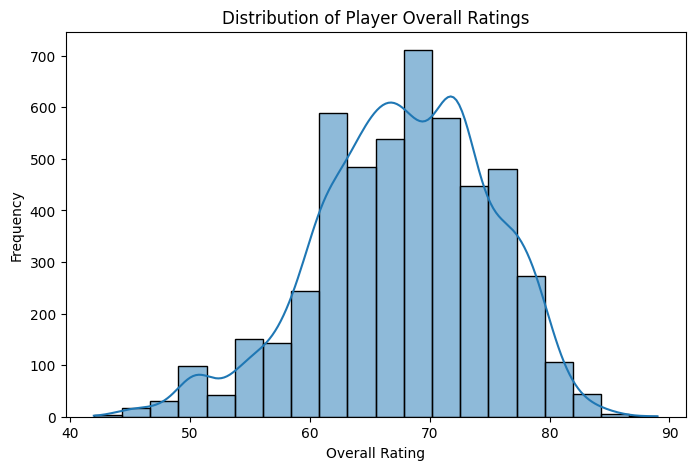

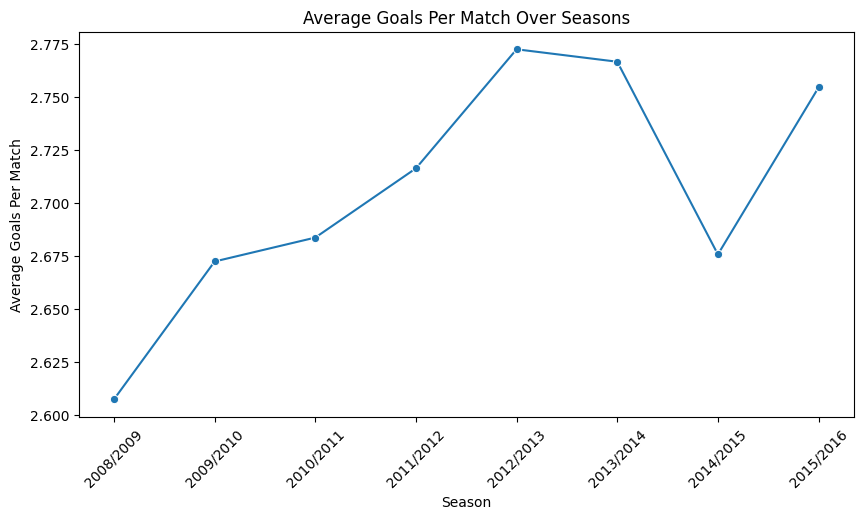

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


db_path = "/home/satvik/Downloads/database.sqlite"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()


def get_table_names():
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    return [table[0] for table in cursor.fetchall() if table[0] != "sqlite_sequence"]

tables = get_table_names()
print("Tables in Database:", tables)


def get_table_info(table_name):
    cursor.execute(f"PRAGMA table_info({table_name});")
    return [(col[1], col[2]) for col in cursor.fetchall()]

table_info = {table: get_table_info(table) for table in tables}
for table, columns in table_info.items():
    print(f"\nTable: {table}")
    for col_name, col_type in columns:
        print(f"  {col_name} ({col_type})")


def check_data_quality(table_name):
    df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT 1000", conn)
    missing_values = df.isnull().sum().sum()
    duplicate_rows = df.duplicated().sum()
    return {"Missing Values": missing_values, "Duplicate Rows": duplicate_rows}

data_quality = {table: check_data_quality(table) for table in tables}
print("\nData Quality Report:")
for table, report in data_quality.items():
    print(f"{table}: {report}")



match_df = pd.read_sql_query("SELECT home_team_goal, away_team_goal FROM Match LIMIT 10000", conn)
match_df['goal_diff'] = match_df['home_team_goal'] - match_df['away_team_goal']

plt.figure(figsize=(8,5))
sns.histplot(match_df['goal_diff'], bins=20, kde=True)
plt.title("Distribution of Home Team Goal Difference")
plt.xlabel("Goal Difference (Home - Away)")
plt.ylabel("Match Count")
plt.show()


player_attr_df = pd.read_sql_query("SELECT overall_rating FROM Player_Attributes LIMIT 5000", conn)

plt.figure(figsize=(8,5))
sns.histplot(player_attr_df['overall_rating'], bins=20, kde=True)
plt.title("Distribution of Player Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()


team_performance_df = pd.read_sql_query("""
    SELECT season, AVG(home_team_goal + away_team_goal) as avg_goals
    FROM Match GROUP BY season
""", conn)

plt.figure(figsize=(10,5))
sns.lineplot(x=team_performance_df['season'], y=team_performance_df['avg_goals'], marker='o')
plt.title("Average Goals Per Match Over Seasons")
plt.xlabel("Season")
plt.ylabel("Average Goals Per Match")
plt.xticks(rotation=45)
plt.show()


conn.close()
